<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/optimizer/AntColonyOptimizer01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ant Colony Optimization

![Ants](2.jpg)

![Ants](1.png)

### Ant Pheromone Trail

![Ants](3.jpg)

In [18]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import itertools
import copy

%matplotlib inline

In [19]:
class TSPmodel:

    def __init__(self, num):
        # create city coordinates
        self.x = [random.randint(0,100) for _ in range(num)]
        self.y = [random.randint(0,100) for _ in range(num)]
        self.cities = list(zip(self.x,self.y))


        # store the number of cities
        self.n = num

        # create distance matrix
        self.d = np.zeros((num,num))

        for i,j in itertools.combinations(self.cities,2):
            # compute the euclidean distance
            distance = math.sqrt((i[0]-j[0])**2 +
                                (i[1]-j[1])**2)

            # find the cities index
            t = self.cities.index(i)
            u = self.cities.index(j)

            self.d[t][u] = distance
            self.d[u][t] = distance

    def plot_model(self):
        for i,j,k in zip(range(self.n), self.x, self.y):
            plt.text(j+0.05, k+0.05, str(i),
            color = 'Black', fontsize = 12)

        plt.plot(self.x,self.y, 'bo')
#         plt.plot(self.x,self.y, 'r--')
        plt.show()

### a sample country

In [4]:
sample_country = TSPmodel(5)

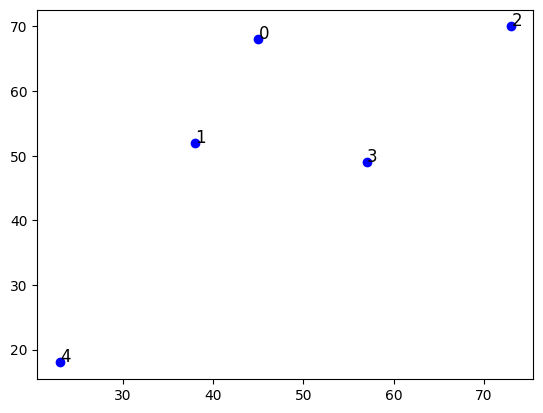

In [5]:
sample_country.plot_model()

### Define the cost function

In [16]:
def tour_length(tour, model):
    # psi = tour
    tour = list(tour)
#     tour = [3,4,1,0,2]
    n = model.n

    # the tour should end to the first city
    tour.append(tour[0])
#     tour = [3,4,1,0,2,3]

    dis = [model.d[tour[i]][tour[i+1]] for i in range(n)]
    return sum(dis)

In [17]:
tour_length([2,3,1,0,4] , sample_country)

189.8651471456089

### Problem Definition

In [8]:
nCities = 30

country = TSPmodel(nCities)

cost_function = lambda t: tour_length(t, country)

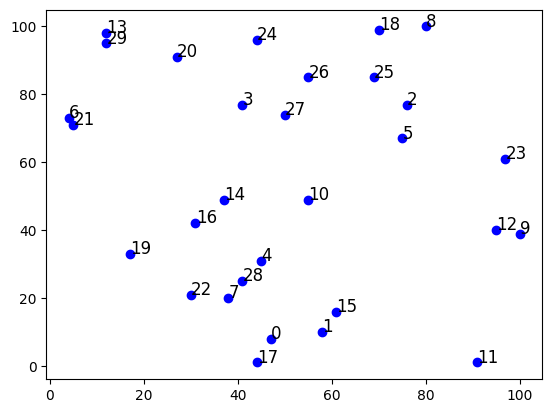

In [9]:
country.plot_model()

### Ant Transition Rule

![p](4.jpg)

### Pheromone Update

![ph](6.png)

![Q](8.png)

Some deposit functions:
    ant system
    elitist ant system
    ant colony system
    MMAS
    simple ant system
    ...

### ACO Hyper parameters definition

In [10]:
maxIt = 300

nAnts = 50

alpha = 1      # pheromone exponential weight
beta = 1       # heuristic exponential weight

Q = 1          # pheromone deposit coefficient

rho = 0.05     # evaporation rate

initial_tau = 1 # inital pheromone

### Initialization

In [11]:
eta = 1 / country.d

tau = initial_tau * np.ones((nCities, nCities))

best_cost = []

class Ant:
    def __init__(self):
        self.tour = []
        self.cost = np.inf

ant = [Ant() for _ in range(nAnts)]

best_ant = Ant()

<ipython-input-11-264fd75800c9>:1: RuntimeWarning: divide by zero encountered in divide
  eta = 1 / country.d


### Roulette Wheel random function

In [12]:
def roulette_wheel(x):      # x is a list of probabilities
    r = random.random()
    prob_cum_sum = np.cumsum(x)
    prob_segment = list(filter(lambda t: r<=t, prob_cum_sum))[0]
    prob_index = list(prob_cum_sum).index(prob_segment)
    return prob_index

### ACO Main Loop

In [13]:
for it in range(maxIt):
    for k in range(nAnts):
        ant[k].tour = [random.randint(0, nCities-1)]

        for _ in range(nCities - 1):
            i = ant[k].tour[-1]

            p = (tau[i,:]**alpha) * (eta[i,:]**beta)

            for psi in ant[k].tour:
                p[psi] = 0

            p /= sum(p)

            j = roulette_wheel(p)

            ant[k].tour.append(j)

        ant[k].cost = cost_function(ant[k].tour)

        if ant[k].cost < best_ant.cost:
            best_ant = copy.deepcopy(ant[k])

    #update pheromones
    #evaporate part
    tau *= 1 - rho

    # deposit part
    for k in range(nAnts):

        tour = ant[k].tour
        tour.append(tour[0])

        for l in range(nCities):
            i = tour[l]
            j = tour[l+1]

            tau[i][j] += Q/ant[k].cost

    # record best cost
    best_cost.append(best_ant.cost)

    #show information
    print ("Iteration {}: Best Cost = {}".format(it, best_ant.cost))

Iteration 0: Best Cost = 890.1204023080793
Iteration 1: Best Cost = 890.1204023080793
Iteration 2: Best Cost = 890.1204023080793
Iteration 3: Best Cost = 890.1204023080793
Iteration 4: Best Cost = 890.1204023080793
Iteration 5: Best Cost = 890.1204023080793
Iteration 6: Best Cost = 890.1204023080793
Iteration 7: Best Cost = 890.1204023080793
Iteration 8: Best Cost = 890.1204023080793
Iteration 9: Best Cost = 890.1204023080793
Iteration 10: Best Cost = 867.9062264746751
Iteration 11: Best Cost = 867.9062264746751
Iteration 12: Best Cost = 867.9062264746751
Iteration 13: Best Cost = 867.9062264746751
Iteration 14: Best Cost = 867.9062264746751
Iteration 15: Best Cost = 867.9062264746751
Iteration 16: Best Cost = 867.9062264746751
Iteration 17: Best Cost = 867.9062264746751
Iteration 18: Best Cost = 867.9062264746751
Iteration 19: Best Cost = 867.9062264746751
Iteration 20: Best Cost = 867.9062264746751
Iteration 21: Best Cost = 867.9062264746751
Iteration 22: Best Cost = 828.371436073390

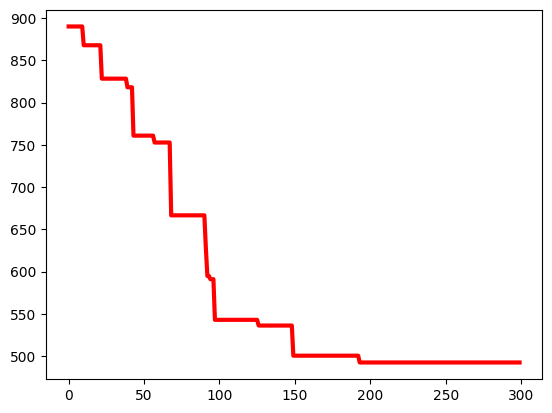

In [14]:
plt.plot(best_cost, linewidth = 3, color = 'r')
plt.show()

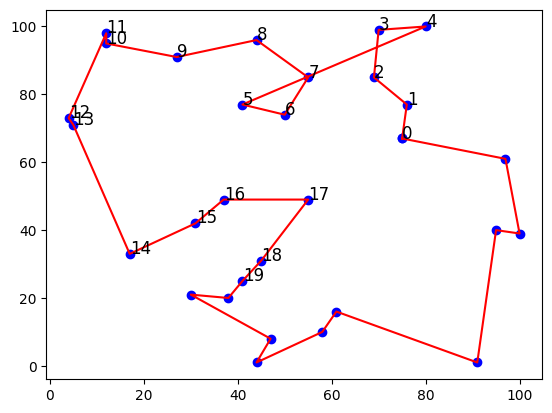

In [15]:
x = [country.x[i] for i in best_ant.tour]
x.append(x[0])
y = [country.y[i] for i in best_ant.tour]
y.append(y[0])
for i,j,k in zip(range(20), x, y):
    plt.text(j+0.05,k+0.05,str(i), color='black', fontsize = 12)

plt.plot(x,y, 'bo')
plt.plot(x,y, 'r-')
plt.show()

In [ ]:
[1,2,3,4]
# cumulative sum
[1,3,6,10]

[1, 3, 6, 10]

In [ ]:
a = [2,5,3,1]

In [ ]:
b = [i/2 for i in a]
b

[1.0, 2.5, 1.5, 0.5]

In [ ]:
a = np.array([2,5,3,1])

In [ ]:
a

array([2, 5, 3, 1])

In [ ]:
a/2

array([1. , 2.5, 1.5, 0.5])

In [ ]:
a.shape

(4,)

In [ ]:
a = np.zeros((2,3,4))

In [ ]:
a

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [ ]:
a[1][2]

array([0., 0., 0., 0.])

In [ ]:
a = [2,4,5,7,1,0]

In [ ]:
list(itertools.combinations(a,2))

[(2, 4),
 (2, 5),
 (2, 7),
 (2, 1),
 (2, 0),
 (4, 5),
 (4, 7),
 (4, 1),
 (4, 0),
 (5, 7),
 (5, 1),
 (5, 0),
 (7, 1),
 (7, 0),
 (1, 0)]

In [ ]:
for i,j in itertools.combinations(a,2):
    print (i,j)

2 4
2 5
2 7
2 1
2 0
4 5
4 7
4 1
4 0
5 7
5 1
5 0
7 1
7 0
1 0
